In [3]:
import pandas as pd
import numpy as np
import os.path
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
path = os.path.abspath("../data/03_modelling/dataset_place.csv")

In [6]:
dataset=pd.read_csv(path,index_col=0)

# open a file, where you stored the pickled data
file = open('../data/03_modelling/dict.placing_segments', 'rb')

# dump information to that file
reaching_seg = pickle.load(file)

# close the file
file.close()

In [7]:
 ##### Predicting
from sklearn.model_selection import train_test_split

y = dataset['next_pos']    #['next_pos']
X = dataset.drop(['time_end','next_pos'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #stratify =y)

In [8]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

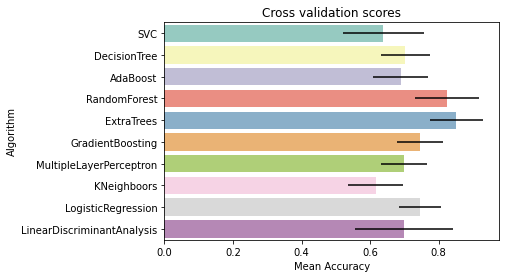

In [9]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [10]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   30.8s
[Parallel(n_jobs=4)]: Done 533 out of 540 | elapsed:   44.7s remaining:    0.6s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   45.1s finished


0.8424242424242424

In [11]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    6.7s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   33.7s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   55.7s finished


0.8707792207792208

In [12]:
GBC = GradientBoostingClassifier()

gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [40,50,60],
              'learning_rate': [0.9,0.8,0.7],
              'max_depth': [0.5,1,2],
              'min_samples_leaf': [30,50,80],
              'max_features': [70,50,30] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   20.8s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 1460 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 1910 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done 2430 out of 2430 | elapsed:  3.6min finished


0.8619047619047618

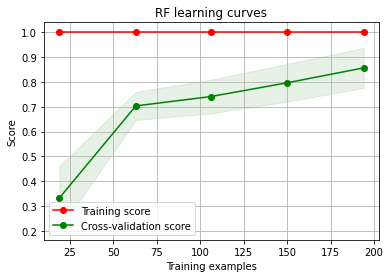

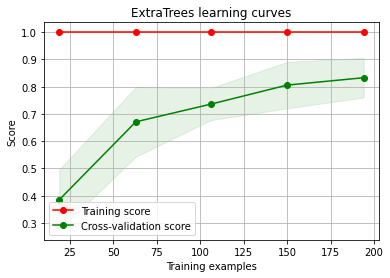

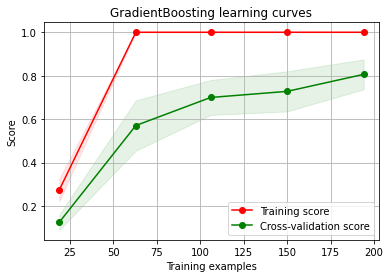

In [13]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,y_train,cv=kfold)

IndexError: list index out of range

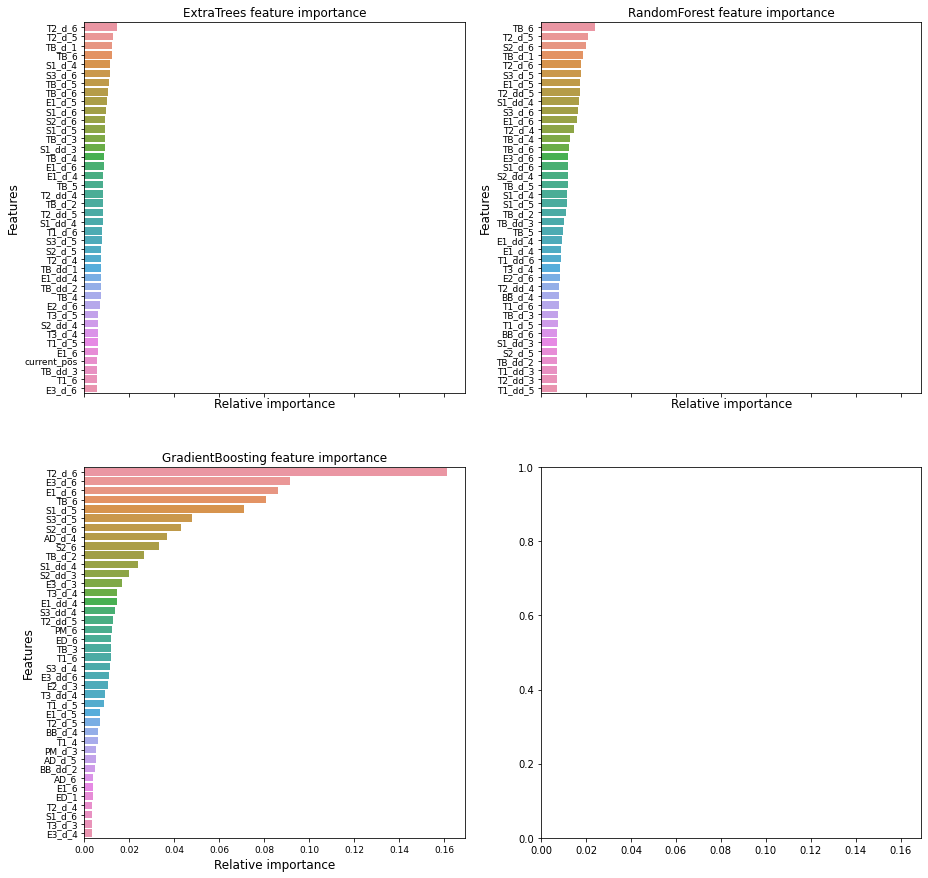

In [14]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

nrows = 2
names_classifiers = [("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

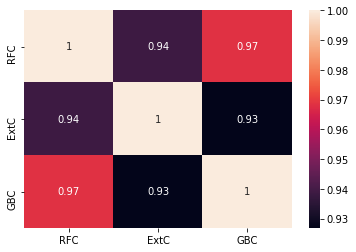

In [15]:
test_Survived_RFC = pd.Series(RFC_best.predict(X_test), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(X_test), name="ExtC")
#test_Survived_SVMC = pd.Series(SVMC_best.predict(test), name="SVC")
#test_Survived_AdaC = pd.Series(ada_best.predict(test), name="Ada")
test_Survived_GBC = pd.Series(GBC_best.predict(X_test), name="GBC")

# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC,test_Survived_ExtC,test_Survived_GBC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

In [16]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc',ExtC_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, y_train)

In [17]:
test = pd.Series(votingC.predict(X_test), name="next_pos")

#results = pd.concat([IDtest,test_Survived],axis=1)

#results.to_csv("ensemble_python_voting.csv",index=False)

In [18]:
cross_val_score(votingC, X_test, y = y_test, scoring = "accuracy", cv = kfold, n_jobs=4)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


array([0.5       , 0.33333333, 1.        , 0.83333333, 0.8       ,
       0.6       , 0.6       , 0.8       , 0.8       , 1.        ])

In [19]:
print(classification_report(y_test, test))

              precision    recall  f1-score   support

         2.0       0.88      0.88      0.88         8
         3.0       0.90      0.90      0.90        10
         4.0       1.00      0.86      0.92         7
         5.0       0.73      1.00      0.84         8
         6.0       0.44      0.57      0.50         7
         7.0       1.00      0.71      0.83        14

    accuracy                           0.81        54
   macro avg       0.82      0.82      0.81        54
weighted avg       0.85      0.81      0.82        54



   CrossValMeans  CrossValerrors         Algorithm
5       0.071246        0.009761  GradientBoosting
4       0.075236        0.008730        ExtraTrees
3       0.079582        0.010088      RandomForest
2       0.079935        0.012856          AdaBoost
0       0.105576        0.022558               SVR
1       0.107432        0.016885      DecisionTree
8       0.118683        0.015858             Ridge
6       0.131602        0.022019        ElasticNet
7       0.134026        0.023740             Lasso


,CrossValMeans,CrossValerrors,Algorithm
5,0.071246,0.009761,GradientBoosting
4,0.075236,0.008730,ExtraTrees
3,0.079582,0.010088,RandomForest
2,0.079935,0.012856,AdaBoost
0,0.105576,0.022558,SVR
1,0.107432,0.016885,DecisionTree
8,0.118683,0.015858,Ridge
6,0.131602,0.022019,ElasticNet
7,0.134026,0.023740,Lasso


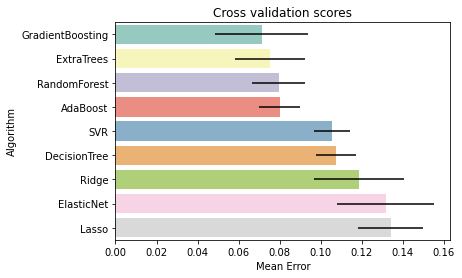

In [21]:
### TIME PERDICTION ###

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV, Ridge, ElasticNet, Lasso

def baseline_regression_models(X_train, y_train, kfolds=0, n_jobs=1):
    
    classifiers = []
    classifiers.append(SVR())
    classifiers.append(DecisionTreeRegressor(random_state=42))
    classifiers.append(AdaBoostRegressor(DecisionTreeRegressor(random_state=42),random_state=42,learning_rate=0.1))
    classifiers.append(RandomForestRegressor(random_state=42))
    classifiers.append(ExtraTreesRegressor(random_state=42))
    classifiers.append(GradientBoostingRegressor(random_state=42))
    #classifiers.append(MLPRegressor(random_state=42))
    classifiers.append(ElasticNet(random_state=42))
    classifiers.append(Lasso(random_state=42))
    classifiers.append(Ridge(random_state=42))
    
    if kfolds ==0:
        kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
    
    cv_results = []
    for classifier in classifiers :
        cv_results.append(-cross_val_score(classifier, X_train, y_train, scoring = "neg_mean_absolute_error", cv = kfolds, n_jobs=n_jobs))
    
    cv_means = []
    cv_std = []
    for cv_result in cv_results:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())
    
    cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVR","DecisionTree","AdaBoost",
    "RandomForest","ExtraTrees","GradientBoosting","ElasticNet","Lasso","Ridge"]})
    
    plt.figure()
    g = sns.barplot("CrossValMeans","Algorithm",data = cv_res.sort_values('CrossValMeans'), palette="Set3",orient = "h",**{'xerr':cv_std})
    g.set_xlabel("Mean Error")
    g = g.set_title("Cross validation scores")

    print(cv_res.sort_values('CrossValMeans'))
    return cv_res.sort_values('CrossValMeans')

y = dataset['time_end']    #['next_pos']
X = dataset.drop(['time_end','next_pos'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #stratify =y)

baseline_regression_models(X_train,y_train,kfolds=10)